<div style="color: magenta; background-color: moccasin; text-align: center; font-size: 35px; border-color: black; border-style: solid; font-family: Georgia; font-style: italic; font-weight: bold;"><b><br><br>Recommender System Problem<br><br><br></div>

In [ ]:
pip install pandas plotly openpyxl

<div style="color: magenta; background-color: moccasin; text-align: center; font-size: 35px; border-color: black; border-style: solid; font-family: Georgia; font-style: italic; font-weight: bold;"><b><br>Libraries<br><br></div>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tkinter import Tk
from tkinter.filedialog import askopenfilename

<div style="color: magenta; background-color: moccasin; text-align: center; font-size: 35px; border-color: black; border-style: solid; font-family: Georgia; font-style: italic; font-weight: bold;"><b><br>Uploading File<br><br></div>

In [ ]:
import pandas as pd
import tkinter as tk
from tkinter.filedialog import askopenfilename

def upload_file():
    # Ask the user to select a file
    filename = askopenfilename(title="Select a file", 
                               filetypes=[("CSV files", "*.csv"), 
                                          ("Excel files", "*.xlsx *.xls"),
                                         ("Text files", ".txt")])
    
    if not filename:
        print("No file selected.")
        return None

    print(f"File selected: {filename}")

    # Check the file extension and read the file accordingly
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)
    else:
        df = pd.read_excel(filename)
    
    print("File uploaded successfully.")
    return df

def on_upload_click():
    global df
    df = upload_file()
    if df is not None:
        print(df)  # Print the first few rows of the dataframe

# Create the main window
root = tk.Tk()
root.title("File Upload")

# Create a button to upload a file
upload_button = tk.Button(root, text="Upload File", command=on_upload_click)
upload_button.pack(pady=20)

# Start the GUI event loop
root.mainloop()


In [ ]:
def choose_columns(df):
    print("Available columns:")
    for col in df.columns:
        print(col)
    chosen_columns = input("Choose column names separated by commas: ").split(",")
    chosen_columns = [col.strip() for col in chosen_columns]
    return df[chosen_columns]

chosen_df = choose_columns(df)



In [ ]:
chosen_df

In [ ]:
def recommend_graphs(df):
    num_cols = df.select_dtypes(include=['number']).columns
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    
    if len(num_cols) >= 2:
        print("Recommended Plot: Scatter plot")
        sns.pairplot(df[num_cols])
        plt.show()
    
    if len(cat_cols) > 0:
        for col in cat_cols:
            print(f"Recommended Plot: Bar plot for {col}")
            sns.countplot(data=df, x=col)
            plt.show()
    
    if len(num_cols) > 0:
        for col in num_cols:
            print(f"Recommended Plot: Histogram for {col}")
            sns.histplot(df[col], kde=True)
            plt.show()
            
            
recommend_graphs(chosen_df)


In [ ]:
def choose_columns(df):
    print("Available columns:")
    for col in df.columns:
        print(col)
    chosen_columns = input("Choose column names separated by commas: ").split(",")
    chosen_columns = [col.strip() for col in chosen_columns]
    return df[chosen_columns]

chosen_df = choose_columns(df)



In [ ]:
df[chosen_columns]

In [ ]:
def choose_columns(df):
    print("Available columns:")
    for col in df.columns:
        print(col)
    chosen_columns = input("Choose column names separated by commas: ").split(",")
    chosen_columns = [col.strip() for col in chosen_columns]
    return chosen_columns

chosen_columns = choose_columns(df)
num_columns_chosen = len(chosen_columns)
print(f"Number of columns chosen by the user: {num_columns_chosen}")

In [ ]:
def plot_pairwise(df):
    for col1 in df.columns:
        for col2 in df.columns:
            if col1 != col2:
                plot_type = get_plot_type(df[col1], df[col2])
                if plot_type == 'quant vs. quant':
                    sns.scatterplot(data=df, x=col1, y=col2)
                    
                elif plot_type == 'quant vs. cat':
                    sns.boxplot(data=df, x=col1, y=col2)
                    sns.violinplot(data=df, x=col1, y=col2)
                
                elif plot_type == 'quant':
                    sns.histplot(df[col1])
                    
                
                elif plot_type == 'cat':
                    sns.barplot(data=df, x=col1, y=col2)
                    
#                 elif plot_type == 'box':
#                     sns.boxplot(data=df, x=col1, y=col2)
#                 elif plot_type == 'violin':
#                         sns.violinplot(data=df, x=col1, y=col2)   
#                 elif plot_type == 'hist':
#                     sns.histplot(df[col1])
#                 elif plot_type == 'count':
#                     sns.countplot(data=df, x=col1)
                    
                plt.title(f"{plot_type.capitalize()} plot of {col1} vs {col2}")
                plt.show()

            
def get_plot_type(col1):
    if not pd.api.types.is_numeric_dtype(col1):
        return 'quant'
    elif pd.api.types.is_numeric_dtype(col1):
        return 'cat'
    return []

def get_plot_types(col1, col2):
    if pd.api.types.is_numeric_dtype(col1) and pd.api.types.is_numeric_dtype(col2):
        return 'quant vs. quant'
    elif pd.api.types.is_numeric_dtype(col1) and not pd.api.types.is_numeric_dtype(col2):
        return 'quant vs. cat'
    elif not pd.api.types.is_numeric_dtype(col1) and pd.api.types.is_numeric_dtype(col2):
        return 'cat vs. quant'
    elif not pd.api.types.is_numeric_dtype(col1) and not pd.api.types.is_numeric_dtype(col2):
        return 'cat vs. cat'
    return []


#chosen_columns = choose_columns(df)
if num_columns_chosen == 1:
    get_plot_type(col1)
    
elif num_columns_chosen == 2:
    get_plot_type(col1, col2)
else:
    print("Please choose one or two columns.")    
    
    
plot_pairwise(chosen_df)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your loaded Iris dataset

def choose_columns(df):
    print("Available columns:")
    for col in df.columns:
        print(col)
    chosen_columns = input("Choose column names separated by commas: ").split(",")
    chosen_columns = [col.strip() for col in chosen_columns]
    return chosen_columns

def plot_pairwise(df, choose_columns):
    if len(chosen_columns) == 1:
        col1 = chosen_columns[0]
        plot_type = get_plot_type(df[col1])
        if plot_type == 'quant':
            sns.histplot(df[col1])
            plt.title(f"Histogram of {col1}")
            plt.show()
        else:
            sns.countplot(x=df[col1])
            plt.title(f"Count plot of {col1}")
            plt.show()
    elif len(chosen_columns) == 2:
        col1, col2 = chosen_columns
        plot_type = get_plot_type(df[col1], df[col2])
        if plot_type == 'quant vs. quant':
            sns.scatterplot(data=df, x=col1, y=col2)
            plt.title(f"Scatter plot of {col1} vs {col2}")
            plt.show()
        elif plot_type == 'quant vs. cat':
            sns.boxplot(data=df, x=col2, y=col1)
            plt.title(f"Box plot of {col1} grouped by {col2}")
            plt.show()
            sns.violinplot(data=df, x=col2, y=col1)
            plt.title(f"Violin plot of {col1} grouped by {col2}")
            plt.show()
        elif plot_type == 'cat vs. quant':
            sns.boxplot(data=df, x=col1, y=col2)
            plt.title(f"Box plot of {col2} grouped by {col1}")
            plt.show()
        elif plot_type == 'cat vs. cat':
            sns.countplot(data=df, x=col1, hue=col2)
            plt.title(f"Count plot of {col1} by {col2}")
            plt.show()
    else:
        print("Please choose one or two columns.")
        
        
        
def get_plot_type(col1, col2=None):
    if col2 is None:
        if pd.api.types.is_numeric_dtype(col1):
            return 'quant'
        elif not pd.api.types.is_numeric_dtype(col1):
            return 'cat'
    else:
        if pd.api.types.is_numeric_dtype(col1) and pd.api.types.is_numeric_dtype(col2):
            return 'quant vs. quant'
        elif pd.api.types.is_numeric_dtype(col1) and not pd.api.types.is_numeric_dtype(col2):
            return 'quant vs. cat'
        elif not pd.api.types.is_numeric_dtype(col1) and pd.api.types.is_numeric_dtype(col2):
            return 'cat vs. quant'
        elif not pd.api.types.is_numeric_dtype(col1) and not pd.api.types.is_numeric_dtype(col2):
            return 'cat vs. cat'
    return 'unknown'

# Example usage
chosen_columns = choose_columns(df)
num_columns_chosen = len(chosen_columns)
print(f"Number of columns chosen by the user: {num_columns_chosen}")


if num_columns_chosen == 1:
    plot_type = get_plot_type(df[chosen_columns[0]].to_frame())
    plot_pairwise(df, chosen_columns)
elif num_columns_chosen == 2:
    plot_type = get_plot_type(df[chosen_columns[0]], df[chosen_columns[1]])
    plot_pairwise(df, chosen_columns)
else:
    print("Please choose one or two columns.")

In [ ]:
import pandas as pd

# Load the CSV file
file_path = 'iris.csv'
df = pd.read_csv(file_path)

# Display the columns
columns = df.columns.tolist()
print("Available columns:", columns)

# Assuming user will select some columns
# For demonstration, let's select the first 3 columns
selected_columns = columns[:3]

print("Selected columns:", selected_columns)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlogram(df, selected_columns):
    # Select only the numeric columns
    numeric_df = df[selected_columns].select_dtypes(include='number')
    
    # Calculate the correlation matrix
    corr = numeric_df.corr()
    
    # Plot the correlogram
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
    plt.title('Correlation Matrix (Correlogram)')
    plt.show()

# Example usage
df = pd.read_csv('iris.csv')
selected_columns = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
plot_correlogram(df, selected_columns)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_circle_heatmap(df, selected_columns):
    # Select only the numeric columns
    numeric_df = df[selected_columns].select_dtypes(include='number')
    
    # Calculate the correlation matrix
    corr = numeric_df.corr()
    
    # Set up the figure and axis
    plt.figure(figsize=(12, 8))
    ax = plt.gca()

    # Create a heatmap with the correlation matrix
    sns.heatmap(corr, annot=False, cmap='coolwarm', center=0, square=True,
                cbar=False, linewidths=0.5, linecolor='black')

    # Draw circles for each correlation coefficient
    for i in range(len(corr.columns)):
        for j in range(len(corr.columns)):
            # Get the correlation coefficient
            corr_value = corr.iloc[i, j]
            
            # Determine the size of the circle
            circle_radius = abs(corr_value) / 2.0
            circle_color = plt.cm.coolwarm((corr_value + 1) / 2)  # Normalize value to colormap range
            
            # Draw the circle in the center of each cell
            circle = plt.Circle((j + 0.5, i + 0.5), circle_radius, color=circle_color, ec='black')
            ax.add_patch(circle)
            
            # Optional: annotate the circle with the correlation coefficient
            if corr_value != 0:
                ax.text(j + 0.5, i + 0.5, f'{corr_value:.2f}', ha='center', va='center', color='black')

    # Adjust the plot
    plt.title('Correlation Matrix with Circles')
    plt.xticks(ticks=np.arange(len(corr.columns)) + 0.5, labels=corr.columns, rotation=45)
    plt.yticks(ticks=np.arange(len(corr.columns)) + 0.5, labels=corr.columns, rotation=0)
    plt.gca().invert_yaxis()  # Invert y-axis to match heatmap orientation
    plt.grid(False)
    plt.show()

# Example usage
df = pd.read_csv('iris.csv')
selected_columns = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
plot_correlation_circle_heatmap(df, selected_columns)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_pie_charts(df, selected_columns):
#     for column in selected_columns:
#         if column in df.columns:
#             # Check if the column is categorical
#             if df[column].dtype == 'object' or df[column].dtype.name == 'category':
#                 # Count the occurrences of each category
    counts = df[selected_columns].value_counts()
                
                # Plot the pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    plt.title(f'Pie Chart of {selected_columns}')
    plt.show()
#             else:
#                 print(f"Column '{column}' is not categorical and cannot be plotted as a pie chart.")
#         else:
#             print(f"Column '{column}' does not exist in the DataFrame.")

# Example usage
df = pd.read_csv('iris.csv')
selected_columns = ['variety']  # Ensure these are categorical columns
plot_pie_charts(df, selected_columns)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def bubble_chart(df, category_col):
    """
    Create a bubble chart with categories on the x-axis and counts on the y-axis.
    The size of the bubbles represents the count of occurrences.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    category_col (str): The name of the categorical column to plot on the x-axis.

    Returns:
    None
    """
    
    # Calculate the count of occurrences for each category
    category_counts = df[category_col].value_counts().reset_index()
    category_counts.columns = [category_col, 'Count']

    # Create a dictionary to map categories to numerical values
    category_map = {cat: i + 1 for i, cat in enumerate(category_counts[category_col].unique())}
    category_counts['Category_num'] = category_counts[category_col].map(category_map)

    # Create a bubble chart
    plt.figure(figsize=(10, 6))
    plt.scatter(
        category_counts['Category_num'], 
        category_counts['Count'], 
        s=category_counts['Count'] * 10,  # Scale the size of bubbles by count
        alpha=0.6, 
        edgecolors='w', 
        color='skyblue'
    )

    # Add labels to the bubbles
    for i in range(len(category_counts)):
        plt.text(
            category_counts['Category_num'][i], 
            category_counts['Count'][i], 
            category_counts['Count'][i], 
            ha='center', va='center', fontsize=12
        )

    # Set the ticks and labels for the x-axis
    plt.xticks(
        ticks=list(category_counts['Category_num'].unique()), 
        labels=category_counts[category_col].unique()
    )
    plt.title(f'Bubble Chart of {category_col} Counts', color='red', size=17)
    plt.xlabel(category_col, color='blue', size=12)
    plt.ylabel('Count', color='blue', size=12)
    plt.grid(True)
    plt.show()

# Example usage
# Sample DataFrame
data = {
    'Variety': ['Apple', 'Banana', 'Apple', 'Cherry', 'Banana', 'Banana', 'Cherry', 'Apple']
}
df = pd.DataFrame(data)

# Call the function
bubble_chart(df, 'Variety')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

def plot_treemap(df, cat_col1, cat_col2):
    
    # Drop rows with missing values in the specified columns
    df = df.dropna(subset=[cat_col1, cat_col2])
    
    # Group by the two categorical columns and calculate counts
    grouped_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='Count')
    
    # Calculate the percentage of each group
    total_count = grouped_data['Count'].sum()
    grouped_data['Percentage'] = grouped_data['Count'] / total_count * 100
    
    # Create labels for each section
    grouped_data['Label'] = (grouped_data[cat_col1] + ' - ' +
                             grouped_data[cat_col2] + ' - ' +
                             grouped_data['Count'].astype(str) + '\n' +
                             grouped_data['Percentage'].round(1).astype(str) + '%')
    
    # Define a color palette
    colors = plt.cm.get_cmap('Dark2', len(grouped_data))
    colors = [colors(i) for i in range(len(grouped_data))]
    
    # Plot the treemap
    plt.figure(figsize=(12, 8))
    squarify.plot(
        sizes=grouped_data['Count'], 
        label=grouped_data['Label'], 
        alpha=0.8, 
        color=colors
    )
    plt.title("Tree Map of Passengers by Embarked Location and Gender", color="red", size=17)
    plt.axis('off')
    plt.show()

# Example usage
# Sample DataFrame
data = {
    'Embarked': ['C', 'Q', 'S', 'C', 'S', 'S', 'C', 'Q'],
    'Sex': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female']
}
df = pd.DataFrame(data)

# Call the function
plot_treemap(df, 'Embarked', 'Sex')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

def plot_mosaic(data, cat1, cat2):
    # Check that both columns are categorical
    if not pd.api.types.is_categorical_dtype(data[cat1]):
        data[cat1] = data[cat1].astype('category')
    if not pd.api.types.is_categorical_dtype(data[cat2]):
        data[cat2] = data[cat2].astype('category')

    # Create a DataFrame with counts for the mosaic plot
    mosaic_data = pd.crosstab(data[cat1], data[cat2])
    
    mosaic_data_perc = mosaic_data.div(mosaic_data.sum(axis=1), axis=0)
    
    # Create the mosaic plot
    plt.figure(figsize=(10, 7))
    props = lambda key: {'color': 'lightblue'}
    mosaic(mosaic_data.stack(), title='Mosaic Plot', properties=props, 
           labelizer=lambda k: f"{mosaic_data_perc.loc[k[0], k[1]]:.1%}")
    
    
    # Create the mosaic plot
    plt.figure(figsize=(10, 7))
    mosaic(mosaic_data.stack(), title='Mosaic Plot')
    plt.xlabel(cat2)
    plt.ylabel(cat1)
    plt.show()


# Example usage:
# Load your dataframe
df = pd.read_csv('Titanic-Dataset.csv')  # Uncomment and specify the path to your CSV file

# Call the function with appropriate column names
plot_mosaic(df, 'Embarked', 'Sex')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

def plot_mosaic(data, cat1, cat2):
    # Check that both columns are categorical
    if not pd.api.types.is_categorical_dtype(data[cat1]):
        data[cat1] = data[cat1].astype('category')
    if not pd.api.types.is_categorical_dtype(data[cat2]):
        data[cat2] = data[cat2].astype('category')

    # Create a DataFrame with counts for the mosaic plot
    mosaic_data = pd.crosstab(data[cat1], data[cat2])
    
    # Calculate percentages
    mosaic_data_perc = mosaic_data.div(mosaic_data.sum(axis=1), axis=0)
    
    def custom_labelizer(keys):
        row, col = keys
        return f"{row}\n{mosaic_data_perc.loc[row, col]:.2%}"
    
    # Create the mosaic plot
    plt.figure(figsize=(10, 7))
#     props = lambda key: {'color': 'lightblue'}
    mosaic(mosaic_data.stack(), title='Mosaic Plot', labelizer=custom_labelizer)
    
    # Set title and labels
    plt.title('Mosaic Plot', color='red')
    plt.xlabel(cat2)
    plt.ylabel(cat1)
    plt.show()

# Example usage:
# Load your dataframe
df = pd.read_csv('Titanic-Dataset.csv')  # Uncomment and specify the path to your CSV file

# Call the function with appropriate column names
plot_mosaic(df, 'Embarked', 'Sex')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_waffle(data, cat1, cat2):
    # Check that both columns are categorical
    if not pd.api.types.is_categorical_dtype(data[cat1]):
        data[cat1] = data[cat1].astype('category')
    if not pd.api.types.is_categorical_dtype(data[cat2]):
        data[cat2] = data[cat2].astype('category')

    # Create a DataFrame with counts for the waffle chart
    counts = data.groupby([cat1, cat2]).size().unstack(fill_value=0)
    
    # Flatten the DataFrame for plotting
    waffle_data = counts.stack().reset_index(name='Count')
    
    # Calculate total number of cells in the grid
    total_count = waffle_data['Count'].sum()
    num_cells = total_count
    
    # Number of cells per row and column in the waffle chart
    num_rows = 10  # You can adjust this as needed
    num_cols = (num_cells // num_rows) + 1

    # Create a grid for the waffle chart
    waffle_grid = np.zeros((num_rows, num_cols))

    # Fill the grid with data
    cell = 0
    for index, row in waffle_data.iterrows():
        category = row[cat2]
        count = row['Count']
        for _ in range(count):
            row_idx = cell // num_cols
            col_idx = cell % num_cols
            waffle_grid[row_idx, col_idx] = category
            cell += 1
    
    # Plotting
    plt.figure(figsize=(12, 6))
    plt.imshow(waffle_grid, cmap='tab20', interpolation='nearest')
    plt.title('Waffle Chart')
    plt.axis('off')
    
    # Add a legend
    categories = waffle_data[cat2].unique()
    handles = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=plt.cm.tab20(i / len(categories)), markersize=10, label=str(cat)) for i, cat in enumerate(categories)]
    plt.legend(handles=handles, title=cat2)
    
    plt.show()

# Example usage:
# Load your dataframe
df = pd.read_csv('Titanic-Dataset.csv')  # Uncomment and specify the path to your CSV file

# Call the function with appropriate column names
plot_waffle(df, 'Embarked', 'Sex')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example DataFrame
import pandas as pd
data = pd.DataFrame({
    'Category': ['A', 'B', 'C'],
    'Value': [1, 4, 6],
    'Error': [0.5, 0.7, 0.6]
})

# Plot
plt.figure(figsize=(8, 6))
plt.bar(data['Category'], data['Value'], yerr=data['Error'], capsize=5, color='lightblue', ecolor='black')
plt.title('Bar Plot with Error Bars')
plt.xlabel('Category')
plt.ylabel('Mean Value')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame
data = pd.DataFrame({
    'Category': ['A', 'A', 'B', 'B', 'C', 'C', 'A', 'B', 'C', 'A'],
    'SubCategory': ['X', 'Y', 'X', 'Y', 'X', 'Y', 'X', 'Y', 'X', 'Y'],
    'Value': [1, 2, 2, 4, 5, 6, 1, 3, 6, 7]
})

# Create Facet Grid
g = sns.FacetGrid(data, col='SubCategory', row='Category', margin_titles=True)

# Map the plot function
g.map_dataframe(sns.scatterplot, x='Value', y='Value', hue='Category', palette='viridis')

# Add titles and labels
g.set_axis_labels('Quantitative Value', 'Quantitative Value')
g.set_titles(col_template="{col_name}", row_template="{row_name}")

# Show legend
g.add_legend()

# Adjust layout
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_pairplot(data, columns=None, hue=None):
    """
    Function to create a pair plot for the given dataframe.

    Parameters:
    - data: pandas DataFrame containing the data.
    - columns: list of column names to include in the pair plot. If None, all columns are used.
    - hue: column name to use for color encoding (optional).
    """
    # Print the column names to help with debugging
#     print("DataFrame columns:", data.columns)

#     if columns is not None:
#         data = data[columns]



#     if hue is not None and hue not in data.columns:
#         raise ValueError(f"Hue column '{hue}' does not exist in the DataFrame.")
    
    sns.pairplot(data, hue=hue)
    plt.show()

# # Load your dataframe
# df = pd.read_csv('Titanic-Dataset.csv')

# # Print the first few rows and columns of the DataFrame to verify
# print(df.head())
# print("Column names in DataFrame:", df.columns)



# Define the columns to include in the pair plot and the hue
columns_to_plot = ['Age', 'Fare', 'Pclass']
hue_column = 'Sex'

# Check for the existence of the hue column and handle if it doesn't exist
if hue_column not in df.columns:
    raise ValueError(f"The column '{hue_column}' does not exist in the DataFrame. Please check the column names.")

# Call the function with appropriate column names
plot_pairplot(df, columns=columns_to_plot, hue=hue_column)


In [ ]:
df['Sex_Survived'] = df['Sex'] + '_' + df['Survived'].astype(str)

sns.catplot(x='Sex_Survived', y='Age', kind='box', data=df)
plt.show()

sns.barplot(x='Sex_Survived', y='Age', data=df)
plt.show()

sns.violinplot(x='Sex_Survived', y='Age', data=df)
plt.show()


sns.pointplot(x='Sex_Survived', y='Age', data=df)
plt.show()


sns.swarmplot(x='Sex_Survived', y='Age', data=df)
plt.show()

sns.stripplot(x='Sex_Survived', y='Age', data=df)
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataframe
df = pd.read_csv('Titanic-Dataset.csv')

# Create a new column combining multiple categorical columns
df['Sex_Survived'] = df['Sex'] + '_' + df['Survived'].astype(str)

# Set up the matplotlib figure
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Comparison of Age by Sex and Survival Status', fontsize=16)

# Box Plot
sns.boxplot(ax=axes[0, 0], x='Sex_Survived', y='Age', data=df)
axes[0, 0].set_title('Box Plot')

# Bar Plot
sns.barplot(ax=axes[0, 1], x='Sex_Survived', y='Age', data=df)
axes[0, 1].set_title('Bar Plot')

# Violin Plot
sns.violinplot(ax=axes[1, 0], x='Sex_Survived', y='Age', data=df)
axes[1, 0].set_title('Violin Plot')

# Point Plot
sns.pointplot(ax=axes[1, 1], x='Sex_Survived', y='Age', data=df)
axes[1, 1].set_title('Point Plot')

# Swarm Plot
sns.swarmplot(ax=axes[2, 0], x='Sex_Survived', y='Age', data=df)
axes[2, 0].set_title('Swarm Plot')

# Strip Plot
sns.stripplot(ax=axes[2, 1], x='Sex_Survived', y='Age', data=df)
axes[2, 1].set_title('Strip Plot')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


C:\Users\DANIYAL\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


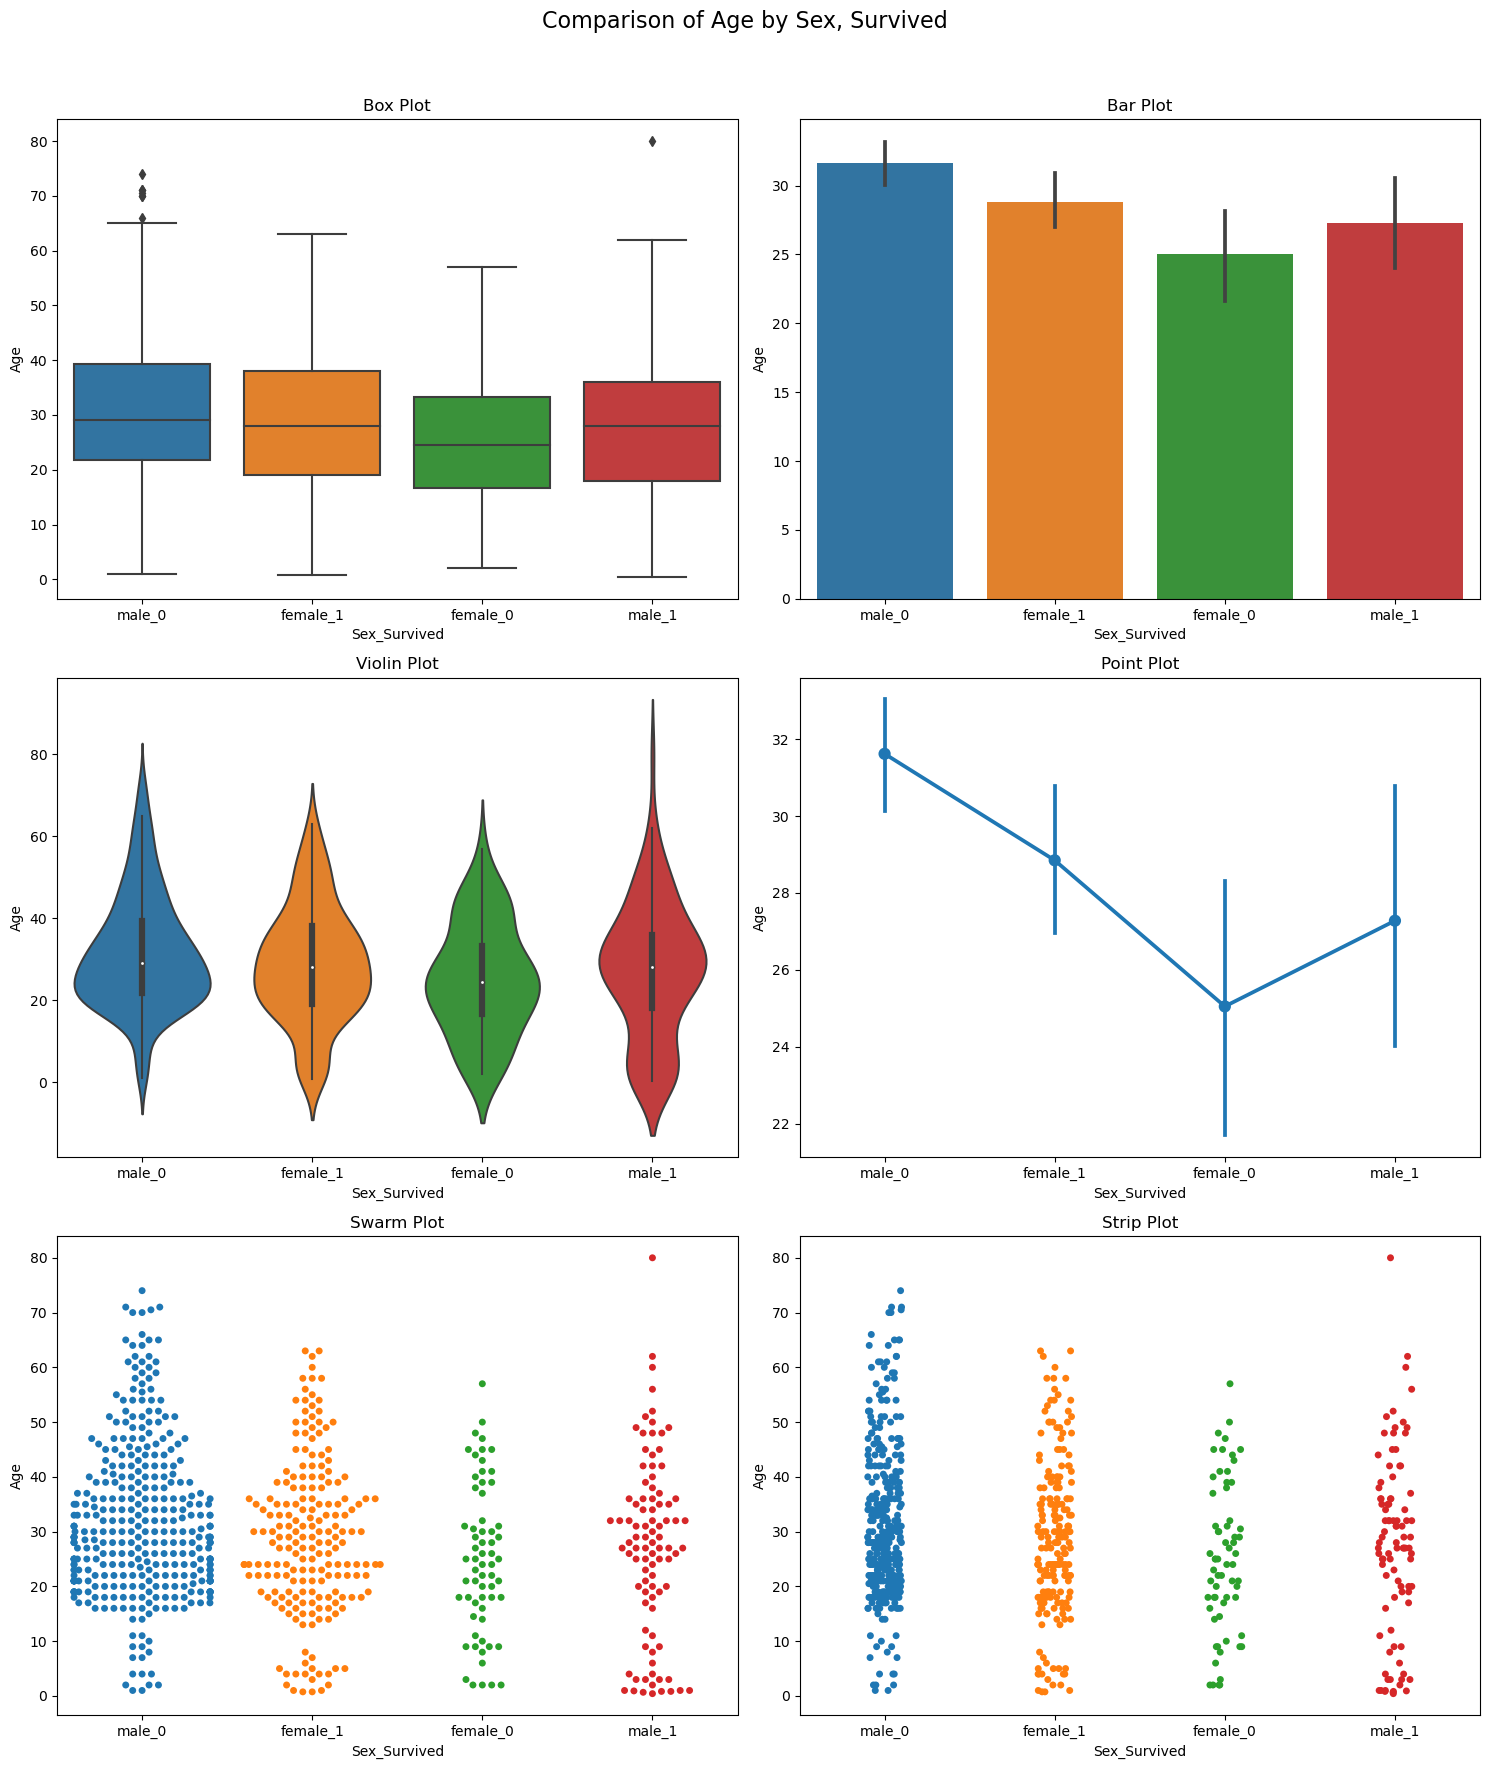

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def validate_columns(data, categ_vars, quant_var):
    """
    Validate the input columns for categorical and quantitative variables.
    
    Parameters:
    - data: pandas DataFrame containing the data.
    - categ_vars: list of categorical column names.
    - quant_var: quantitative column name.
    
    Raises:
    - ValueError if the validation fails.
    """
    if len(categ_vars) < 2:
        raise ValueError("There should be at least two categorical variables.")
    
    if quant_var not in data.columns:
        raise ValueError(f"Quantitative column '{quant_var}' does not exist in the DataFrame.")
    
    for col in categ_vars:
        if col not in data.columns:
            raise ValueError(f"Categorical column '{col}' does not exist in the DataFrame.")

def create_combined_column(data, categ_vars):
    """
    Create a new column by combining multiple categorical columns.
    
    Parameters:
    - data: pandas DataFrame containing the data.
    - categ_vars: list of categorical column names.
    
    Returns:
    - pandas DataFrame with the new combined column.
    """
    new_col_name = '_'.join(categ_vars)
    data[new_col_name] = data[categ_vars].astype(str).agg('_'.join, axis=1)
    return new_col_name

def plot_categorical_vs_quantitative(data, categ_vars, quant_var):
    """
    Create multiple plots for categorical vs. quantitative variables in one figure.
    
    Parameters:
    - data: pandas DataFrame containing the data.
    - categ_vars: list of categorical column names.
    - quant_var: quantitative column name.
    """
    # Validate columns
    validate_columns(data, categ_vars, quant_var)
    
    # Create a new combined column
    combined_col = create_combined_column(data, categ_vars)
    
    # Set up the matplotlib figure
    fig, axes = plt.subplots(3, 2, figsize=(15, 18))
    fig.suptitle(f'Comparison of {quant_var} by {", ".join(categ_vars)}', fontsize=16)
    
    # Define plot types and corresponding seaborn functions
    plot_types = {
        'Box Plot': sns.boxplot,
        'Bar Plot': sns.barplot,
        'Violin Plot': sns.violinplot,
        'Point Plot': sns.pointplot,
        'Swarm Plot': sns.swarmplot,
        'Strip Plot': sns.stripplot
    }
    
    # Generate plots
    for ax, (title, plot_func) in zip(axes.flatten(), plot_types.items()):
        plot_func(ax=ax, x=combined_col, y=quant_var, data=data)
        ax.set_title(title)
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Load your dataframe
df = pd.read_csv('Titanic-Dataset.csv')

# Define categorical and quantitative columns
categorical_columns = ['Sex', 'Survived']
quantitative_column = 'Age'

# Call the function with the desired parameters
plot_categorical_vs_quantitative(df, categorical_columns, quantitative_column)
